In [1]:
import argparse
import datetime
from functools import partial
from typing import Iterable, Tuple
import numpy as np
import toml
import torch
from torch import Tensor
from tqdm import tqdm
import wandb
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.nn.functional import pad
from torch.nn.functional import softmax, cross_entropy

from einops import rearrange, reduce
from jaxtyping import Float, Array

import os 

In [2]:
a = torch.randn((1, 1, 100, 100))
b = torch.randn((1, 1, 100, 100))
c = torch.randn((1, 1, 100, 100))
d = torch.randn((1, 1, 100, 100))

In [3]:
torch2numpy = lambda x: x[0].permute(1, 2, 0).clone().detach().cpu().numpy()

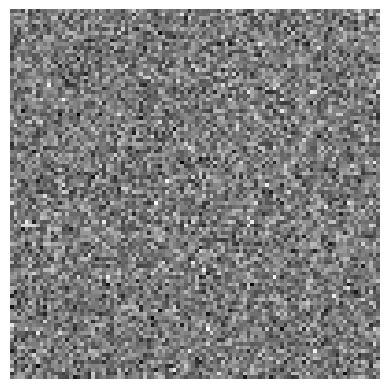

In [7]:
plt.axis("off")
plt.imshow(torch2numpy(a), cmap='gray')

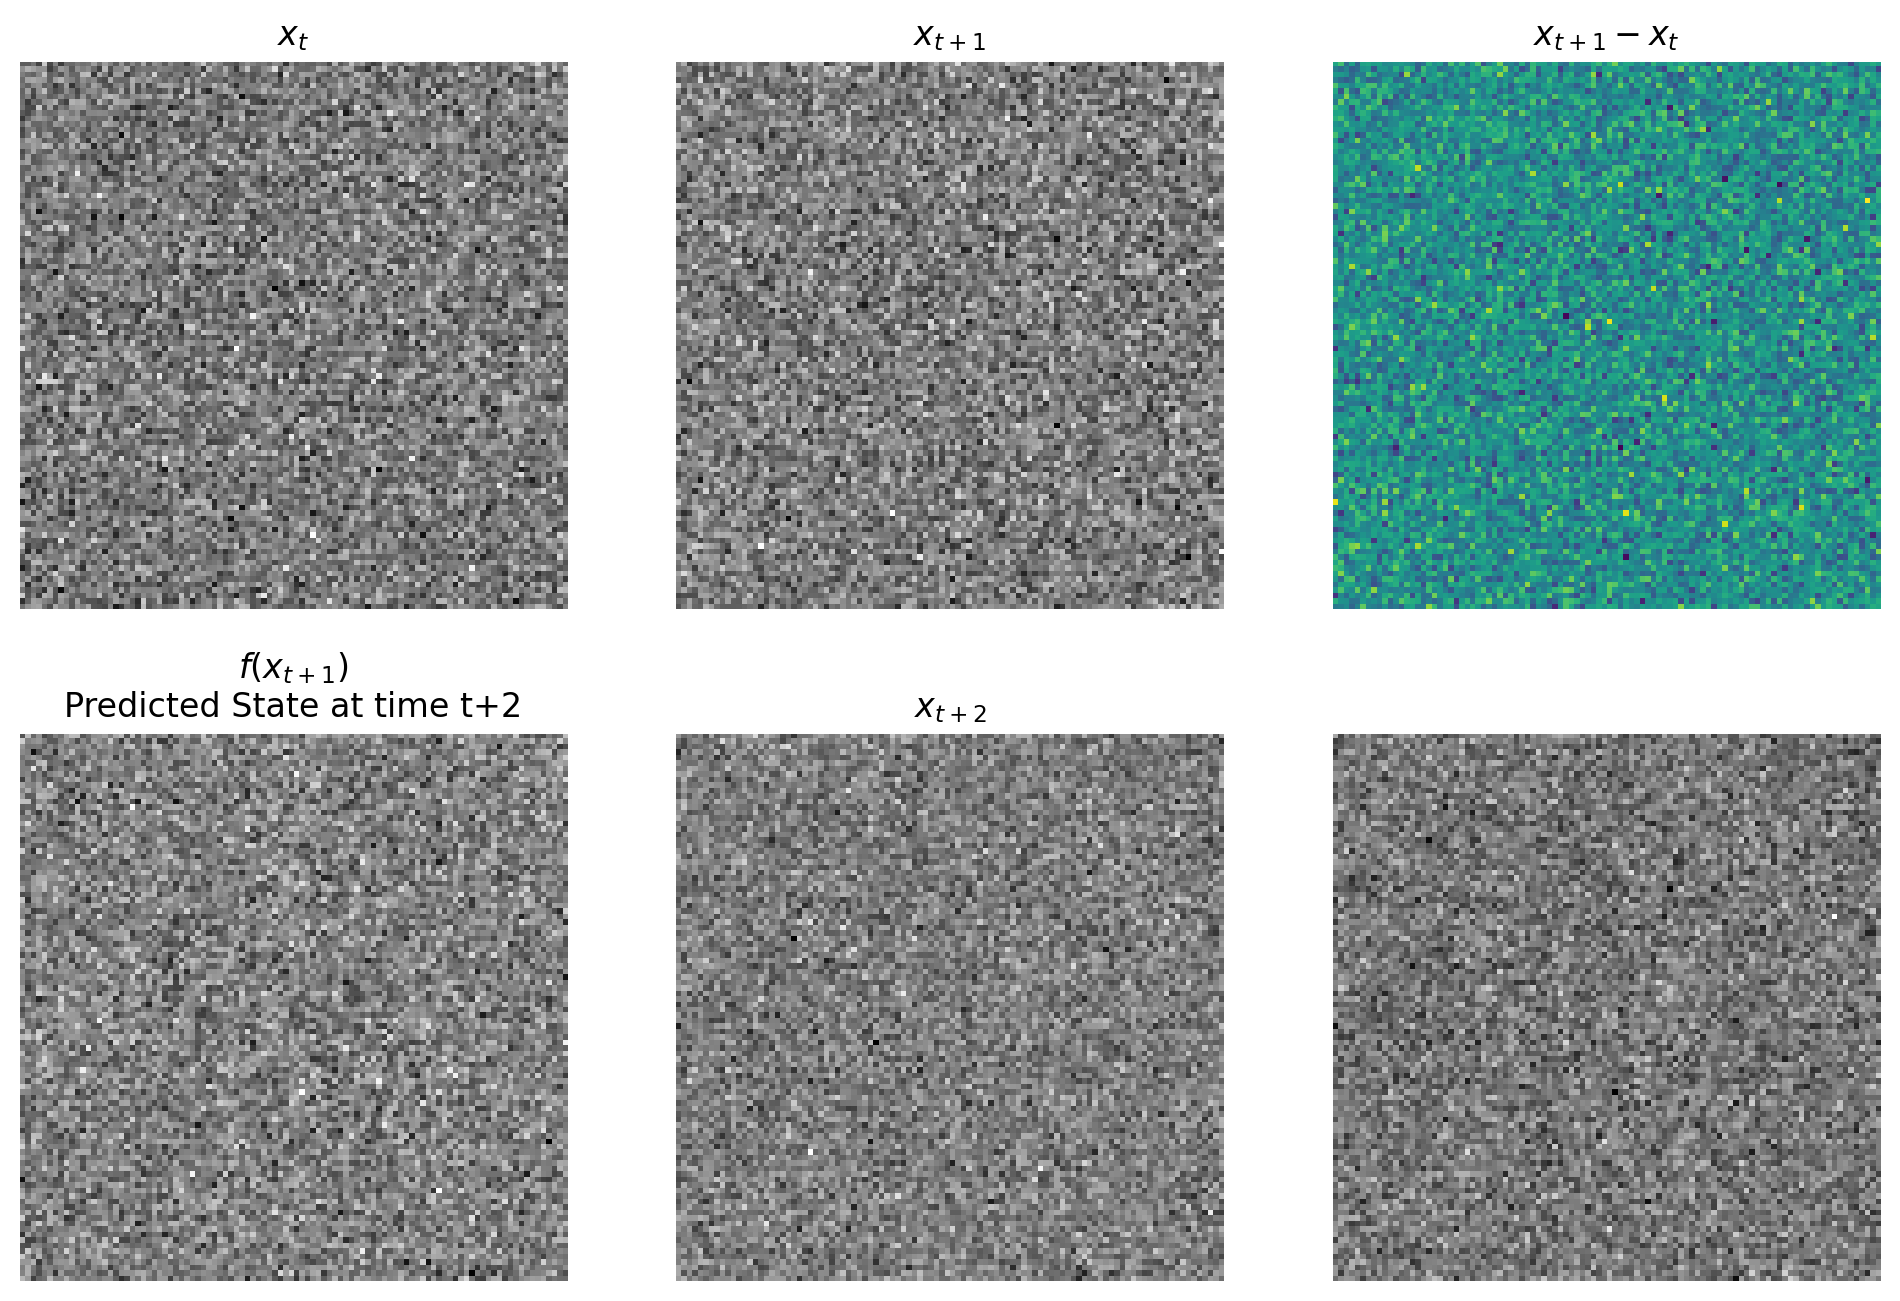

In [36]:
fig, ((ax1, ax2, ax5), (ax3, ax4, ax6)) = plt.subplots(2, 3, figsize=(12, 8), dpi=200)

ax1.axis("off")
ax1.imshow(torch2numpy(a), cmap='gray')
ax1.set_title(r"$x_{t}$")

ax2.axis("off")
ax2.imshow(torch2numpy(b), cmap='gray')
ax2.set_title(r"$x_{t+1}$")

ax3.axis("off")
ax3.imshow(torch2numpy(c), cmap='gray')
ax3.set_title("$f(x_{t+1})$\nPredicted State at time t+2")

ax4.axis("off")
ax4.imshow(torch2numpy(d), cmap='gray')
ax4.set_title(r"$x_{t+2}$")

ax5.axis("off")
ax5.imshow(torch2numpy(b - a))
ax5.set_title(r"$x_{t+1} - x_{t}$")

ax6.axis("off")
ax6.imshow(torch2numpy(d - c), cmap='gray')

In [26]:
from io import BytesIO

buf = BytesIO()
fig.savefig(buf, format='png')
buf.seek(0)

0

In [30]:
from PIL import Image
image = np.array(Image.open(buf))[:, :, :3]

image.shape

(1600, 2400, 3)

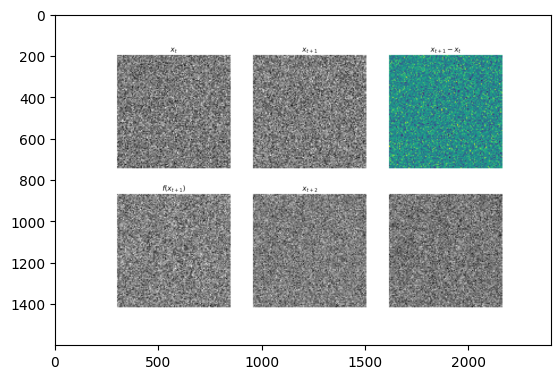

In [31]:
plt.imshow(image)